In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import sklearn.model_selection

X = pd.read_excel("data/chapter09.xlsx")
X.head()

,年齢,日照時間,気温,収入,貯金,最寄り駅距離,生活満足度,所得格差,犯罪件数
0,42.071879,12.508286,15.220903,413.694777,57.118319,617.464087,-0.428834,0.318815,12.651239
1,7.152084,11.907399,2.776565,512.120232,144.391088,809.448992,-0.542745,-0.950023,7.268447
2,69.403248,17.375372,6.701242,789.698344,91.887523,1452.372370,-1.280421,-0.453475,20.049917
3,75.422547,12.490551,14.056658,573.070658,-193.892573,1014.406931,-0.546698,-0.141527,15.899105
4,43.569625,13.207442,3.175976,739.597372,142.009926,1748.499407,1.120864,-0.115734,19.690084


In [2]:
y = X["犯罪件数"]
X2 = X.copy().drop("犯罪件数", axis=1)

[
    X_train,
    X_test,
    y_train,
    y_test
] = sklearn.model_selection.train_test_split(
    X2, y, random_state=0
)

In [3]:
model_rfr = RandomForestRegressor(random_state=0)
model_rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [4]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [5]:
#ステップ1
y_train_pred = model_rfr.predict(X_train)
y_test_pred = model_rfr.predict(X_test)

#ステップ2
rmse_train = mean_squared_error(
    y_train,
    y_train_pred,
    squared=False
)
rmse_test = mean_squared_error(
    y_test,
    y_test_pred,
    squared=False
)

#ステップ3
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

In [6]:
print("RMSE 学習：", rmse_train, ", RMSE 評価：", rmse_test)
print("R-sq 学習：", r2_train, ", R-sq 評価：", r2_test)

RMSE 学習： 0.8304062670873419 , RMSE 評価： 2.458638522565331
R-sq 学習： 0.9645738899274929 , R-sq 評価： 0.7438581754041189


In [7]:
print(y_train.median())
print(y_train.mean())

15.911048229575503
15.832757363071508


In [8]:
print(y_test.median())
print(y_test.mean())

16.153316575147684
15.89758388859114


<Axes: title={'center': '犯罪件数と犯罪件数予想の関係'}, xlabel='y_test', ylabel='y予想'>

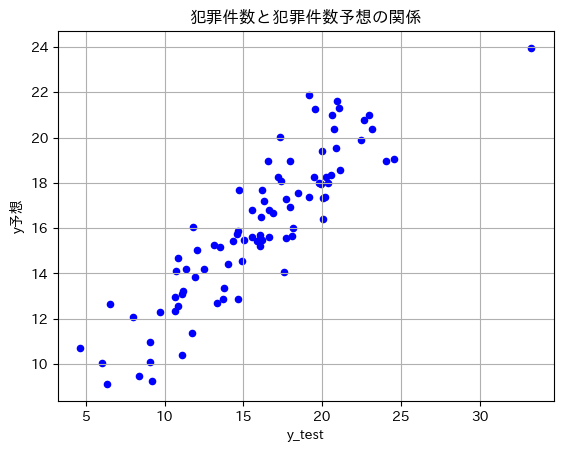

In [9]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

test_results = pd.DataFrame({
    "y_test": y_test,
    "y予想": y_test_pred,
})
test_results.head()

test_results.plot(
    kind="scatter",
    x="y_test",
    y="y予想",
    color="b",
    title="犯罪件数と犯罪件数予想の関係",
    grid=True
)

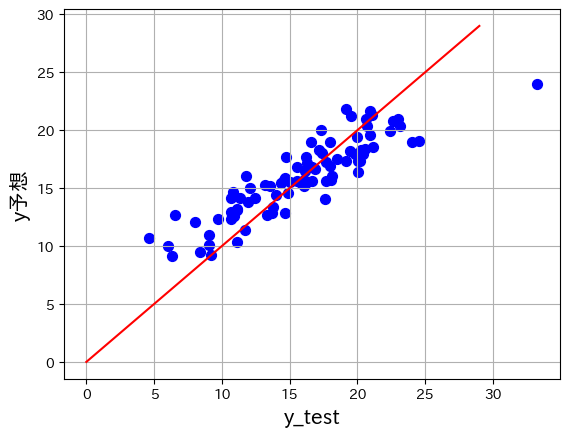

In [10]:
import numpy as np

x = np.arange(0, 30)
y = x

x1 = test_results["y_test"]
y1 = test_results["y予想"]


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.xlabel("y_test", fontsize=15)
plt.ylabel("y予想", fontsize=15)
ax.scatter(x1, y1, s=50, c="b")
ax.grid(True)
ax.plot(x, y, c="r")

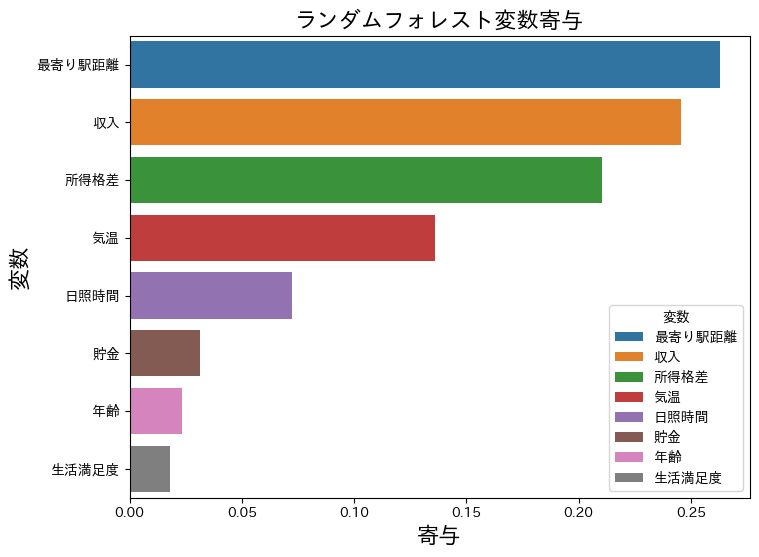

In [11]:
rf_imp = pd.DataFrame({
    "寄与": model_rfr.feature_importances_,
    "変数": X2.columns,
})
rf_imp = rf_imp.sort_values(by="寄与", ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(
    x="寄与",
    y="変数",
    data=rf_imp,
    hue="変数",
    dodge=False,
    orient="h"
)
plt.title("ランダムフォレスト変数寄与", fontsize=16)
plt.ylabel("変数", fontsize=16)
plt.xlabel("寄与", fontsize=16)

plt.show()

In [12]:
y = X["犯罪件数"]
X2 = X.copy().drop("犯罪件数", axis=1)

[
    X_train,
    X_test,
    y_train,
    y_test
] = sklearn.model_selection.train_test_split(
    X2, y, test_size=0.25, random_state=1
)

In [13]:
print(len(X2))
print(len(X_train))
print(len(X_test))

350
262
88


In [14]:
print(y_train.median())
print(y_train.mean())

print(y_test.median())
print(y_test.mean())

16.209991004317253
15.984154527038438
15.095326683591894
15.44683324132595
